<a href="https://colab.research.google.com/github/destiny-park/DataAnalysis/blob/main/Tutorial_%EB%B9%85%EB%B6%84%EA%B8%B0%EC%9E%91%EC%97%85%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#데이터 저장 경로 지정
datadir = r'/content/drive/MyDrive/DataAnalysis/TaskData'

# **Task1 2회 기출유형 Python**


## **문제1**
데이터셋(task1.csv)의 'f5' 컬럼을 기준으로 상위 10개의 데이터를 구하고,

'f5'컬럼 10개 중 최소값으로 데이터를 대체한 후,

'age'컬럼에서 80 이상인 데이터의'f5 컬럼 평균값 구하기

In [ ]:
#경로 지정
import os
import pandas as pd

task = os.path.join(datadir,'task1.csv')
df = pd.read_csv(task)

#데이터탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


In [ ]:
#'f5'컬럼 기준으로 내림차순
df = df.sort_values('f5',ascending=False)
df.head(10)

,id,age,city,f1,f2,f3,f4,f5
10,id11,40.0,서울,68.0,0,NaN,ENFP,98.429899
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
9,id10,95.0,서울,74.0,1,NaN,ISFP,98.429899
76,id77,77.0,경기,31.0,0,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
91,id92,97.0,경기,78.0,1,NaN,INFP,97.381034
86,id87,19.0,경기,NaN,1,NaN,ISFP,97.381034
71,id72,8.0,경기,97.0,0,NaN,ESTJ,97.381034
11,id12,20.0,서울,NaN,0,NaN,ESTP,91.297791
19,id20,11.0,서울,51.0,1,NaN,INTJ,91.297791


In [ ]:
#상위 10개 중 최소 값 구함
min = df['f5'][:10].min()

#상위 10개 값에 대해 최소값으로 변환
df['f5'][:10] = min
df.head(10)

In [ ]:
#age가 80이상인 데이터의 f5 열의 평균
print(df.loc[df['age']>=80].f5.mean())

62.497747125217394


## **문제2**
데이터셋(task1.csv)의 앞에서 순서대로 70% 데이터만 활용해서,


'f1'컬럼 결측치를 중앙값으로 채우기 전후의 표준편차를 구하고


두 표준편차 차이 계산하기

In [ ]:
#라이브러리 불러오기
import pandas as pd
import os

#데이터 불러오기
task = os.path.join(datadir,'task1.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색하기
print("데이터의 행과 열 :")
print(df.shape)

print("데이터의 정보")
print(df.info())

데이터의 행과 열 :
(100, 8)
데이터의 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB
None


In [ ]:
#데이터 70%만 사용하기
df70 = df[:70]
df30 = df[70:]

print("df70 행열 : ",df70.shape)
print("df30 행열 : ",df30.shape)

df70 행열 :  (70, 8)
df30 행열 :  (30, 8)


In [ ]:
#numpy 사용해서 나누기
import numpy as np
df70, df30 = np.split(df, [int(.7*len(df))])

#랜덤 샘플링 후 나누기
df70 = df.sample(frac = 0.7)
df30 = df.drop(df70.index)

In [ ]:
#df70의 f1 필드의 중앙값과 표준편차 찾기
median = df70.f1.median()
sd_before = df70.f1.std()

print("결측치 제거 전 중앙값 : {}, 표준편차 : {}".format(median,sd_before))

결측치 제거 전 중앙값 : 63.5, 표준편차 : 17.952051483946608


In [ ]:
#df70의 f1필드의 결측값에 중앙값을 채운 후 표준편차 구하기
print("결측값 수 : ",df70.f1.isnull().sum())

#결측값에 median 값 채우기
df70['f1'] = df70['f1'].fillna(median)
print("결측값 제거 후 결측값 수 : ",df70.f1.isnull().sum())

#표준편차 구하기
sd_after = df70.f1.std()
print("결측치 제거 후 중앙값 : {}, 표준편차 : {}".format(df70['f1'].median(),sd_after))

결측값 수 :  22
결측값 제거 후 결측값 수 :  0
결측치 제거 후 중앙값 : 63.5, 표준편차 : 14.889093094198245


In [ ]:
#표준편차 간 차이 구하기
diff = (sd_before)-(sd_after)
print(diff)

3.0629583897483634


## **문제3**

데이터셋(task1.csv)의 'age'컬럼의 이상치를 더하시오!

단, 평균으로부터 '표준편차*1.5'를 벗어나는 영역을 이상치라고 판단함

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1.csv')
df = pd.read_csv(task)

In [ ]:
#age 컬럼의 평균과 표준편차 구하기
mean = df.age.mean()
sd = df.age.std()

print("age 컬럼의 평균 : {}, 표준편차 : {}".format(mean,sd))

age 컬럼의 평균 : 50.963, 표준편차 : 30.442758522588697


In [ ]:
#이상치 찾기
Ans = df.loc[(df['age']>mean+1.5*sd)|(df['age']<mean-1.5*sd)]
print("이상치 데이터 프레임 행열 수 : ",Ans.shape)

#이상치 값 전부 더하기
print(Ans.age.sum())

이상치 데이터 프레임 행열 수 :  (14, 8)
473.5


# **Task1-1. 이상치 찾기 (IQR 활용)**

데이터(task1_1.csv)에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

task = os.path.join(datadir,'task1_1.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색하기
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Q1와 Q3 값을 구하기
Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)

IQR = Q3-Q1

print("1IQR : {}, 3IQR : {}\n--->IQR : {}".format(Q1, Q3, IQR))

1IQR : 7.9104, 3IQR : 31.0
--->IQR : 23.0896


In [ ]:
min = Q1-1.5*IQR
max = Q3+1.5*IQR

Ans = df.loc[(df.Fare > max)|(df.Fare < min)]
Ans = Ans.loc[df.Sex=='female']
print(Ans.shape[0])


70


# **Task1-2. 이상치 찾기 (소수점 나이)**

주어진 데이터(task1_2.csv)에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색하기
print("데이터 정보")
df.head(5)


데이터 정보


,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [ ]:
#데이터 탐색하기
print("결측값 찾기")
df.isnull().sum()

결측값 찾기


id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [ ]:
#소수점으로 되어있는 나이 찾기
ans = df.loc[df.age%1!=0]
ans

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [ ]:
#올림, 내림, 버림을 위한 numpy 라이브러리
#올림 : np.ceil() / 내림 : np.floor() / 버림 : np.trunc()
import numpy as np

#올림, 내림, 버림
m_ceil = np.ceil(ans.age).mean()
m_floor = np.floor(ans.age).mean()
m_trunc = np.trunc(ans.age).mean()

#데이터 합해서 출력
print(m_ceil+m_floor+m_trunc)

69.5


# **Task1-3. 결측치 처리 (map 활용)**



*   주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고,
*   80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 
*   'f1'컬럼의 평균값을 출력하세요!
*   데이터셋 : task1_1.csv
*   강의 영상 : https://youtu.be/WqlpqBRn7x4



In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#결측치 %확인하기
df.isnull().sum()/df.shape[0]*100

id       0.0
age      0.0
city     0.0
f1      31.0
f2       0.0
f3      95.0
f4       0.0
f5       0.0
dtype: float64

In [ ]:
#결측치가 80%이상인 컬럼 삭제
df = df.drop(['f3'],axis=1)
print(df.shape)

(100, 7)


In [ ]:
#결측치가 80%이하인 컬럼은 city 그룹의 mean 값으로 설정
#도시 확인
print(df['city'].unique())

['서울' '부산' '대구' '경기']


In [ ]:
#그룹별 median 구해서 map 생성
k,d,b,s = df.groupby(df.city).f1.median()
map = {'경기':k, "대구":d, "부산":b,"서울":s}
map

{'경기': 58.0, '대구': 75.0, '부산': 62.0, '서울': 68.0}

In [ ]:
#결측값 대체하기
df['f1'] = df['f1'].fillna(df['city'].map(lambda x : map[x]))
print(df.f1.isnull().sum())

0


In [ ]:
#결과 출력
print(df.f1.mean())

65.52


# **Task1-4. 왜도와 첨도 구하기 (로그 스케일)**



*   주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 
*   'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 
*   모두 더한 다음 소수점 2째자리까지 출력하시오
*   데이터셋 : task1_4.csv

*   강의 영상 : https://youtu.be/_ft7ZlDlk7c



In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_4.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
#왜도 : DataFrame.skew() / 첨도 : DataFrame.kurt()
skew_b = df.SalePrice.skew()
kurt_b = df.SalePrice.kurt()

print("로그 변환 전 왜도 : {} , 첨도 : {}".format(skew_b, kurt_b))

로그 변환 전 왜도 : 1.8828757597682129 , 첨도 : 6.536281860064529


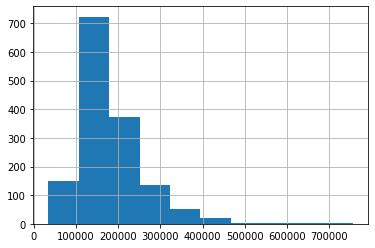

In [ ]:
df.SalePrice.hist()

In [ ]:
#로그 변환
import numpy as np
df['SalePrice'] = np.log1p(df['SalePrice'])

In [ ]:
#왜도 : DataFrame.skew() / 첨도 : DataFrame.kurt()
skew_a = df.SalePrice.skew()
kurt_a = df.SalePrice.kurt()

print("로그 변환 후 왜도 : {} , 첨도 : {}".format(skew_a, kurt_a))

로그 변환 후 왜도 : 0.12134661989685333 , 첨도 : 0.809519155707878


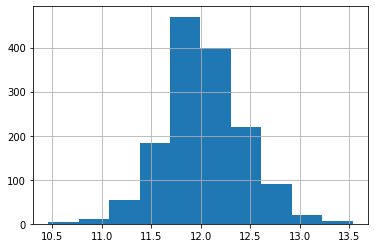

In [ ]:
df.SalePrice.hist()

In [ ]:
#결과값 출력
print(round(skew_a+skew_b+kurt_a+kurt_b,2))

9.35


# **Task1-5. 조건에 맞는 데이터 표준 편차 구하기**

*   주어진 데이터 중 task1_2.csv에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오
*   데이터셋 : task1_2.csv

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색
df.head(4)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078


In [ ]:
#f4 필드 별로 그룹화하여 f1의 표준편차 차이 구하기
stdGroup = df.groupby(df.f4).f1.std()
stdGroup

f4
ENFJ    17.727098
ENFP     8.154753
ENTJ    23.228933
ENTP    13.217413
ESFJ    19.189841
ESFP    16.502525
ESTJ    10.456258
ESTP    25.095152
INFJ    26.057628
INFP    23.586719
INTJ    28.571548
INTP    15.616231
ISFJ    20.029839
ISFP    15.215124
ISTJ          NaN
ISTP    18.083141
Name: f1, dtype: float64

In [ ]:
#ENFJ와 INFP의 차이 구하기
diff = stdGroup["ENFJ"]-stdGroup['INFP']

#절대값 취하기
import numpy as np
print(np.abs(diff))

5.859621525876815


# **Task1-6. 결측치 제거 및 그룹합계**



*   주어진 데이터 중 task1_2.csv에서 'f1'컬럼 결측 데이터를 제거하고, 
*   'city'와 'f2'을 기준으로 묶어 합계를 구하고, '
*   city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오
*   데이터셋 : task1_2.csv





In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색
df.head(3)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986


In [ ]:
#데이터 결측치 탐색
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [ ]:
#f1 필드 데이터 결측 컬럼삭제
df = df[~df['f1'].isnull()]

df.isnull().sum()

id       0
age      0
city     0
f1       0
f2       0
f3      65
f4       0
f5       0
dtype: int64

In [ ]:
#'city'와 'f2'을 기준으로 묶어 합계를 구하기
Ans = df.groupby(['city','f2']).sum()
Ans

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [ ]:
#city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오
Ans.iloc[0]['f1']

833.0

# **Task1-7. 값 변경 및 2개 이상의 조건**



*   'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고,
*   'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오!
*   데이터셋 : task1_2.csv

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#그룹별 행 갯수 출력
df.groupby('f4').id.count()

f4
ENFJ     6
ENFP     6
ENTJ     5
ENTP     6
ESFJ     5
ESFP     4
ESTJ     9
ESTP    11
INFJ     4
INFP     6
INTJ     4
INTP     8
ISFJ    10
ISFP    10
ISTJ     2
ISTP     4
Name: id, dtype: int64

In [ ]:
#f4 컬럼이 ESFJ 인 데이터를 ISFJ로 변경
df.loc[df['f4']=='ESFJ'] = 'ISFJ'

In [ ]:
#그룹별 행 갯수 출력
df.groupby('f4').id.count()

f4
ENFJ     6
ENFP     6
ENTJ     5
ENTP     6
ESFP     4
ESTJ     9
ESTP    11
INFJ     4
INFP     6
INTJ     4
INTP     8
ISFJ    15
ISFP    10
ISTJ     2
ISTP     4
Name: id, dtype: int64

In [ ]:
#city가 경기이면서, f4가 ISFJ데이터의 age 컬럼 최대 값 구하기
Ans = df.loc[(df.city=='경기')&(df.f4=='ISFJ')].age.max()
Ans

90.0

# **Task1-8. 누적합 그리고 보간 (결측치 처리)**



*   주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다.
*   이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고,
*   누적합의 평균값을 출력한다. 
*   (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)
*   데이터셋 : basic1.csv

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#'f2' 컬럼이 1인 조건에 해당하는 데이터 누적합
df2 = df.loc[df.f2==1].f1.cumsum()
df2.head(10)

1      70.0
2     131.0
6     191.0
7     292.0
9     366.0
13    416.0
14    483.0
16      NaN
19    534.0
20      NaN
Name: f1, dtype: float64

In [ ]:
#결측치 처리 바로 뒤의 값으로 채우기
df2 = df2.fillna(method='bfill')
df2.head(10)

1      70.0
2     131.0
6     191.0
7     292.0
9     366.0
13    416.0
14    483.0
16    534.0
19    534.0
20    606.0
Name: f1, dtype: float64

In [ ]:
#누적 합의 평균
df2.mean()

980.3783783783783

# **Task1-9. 수치형 변수 표준화**



*   주어진 데이터에서 'f5'컬럼을 표준화(Standardization (Z-score Normalization))하고 
*   그 중앙값을 구하시오
*   데이터셋 : task1_2.csv



In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#표준화를 위한 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler

#표준화 스케일러
ss = StandardScaler()


In [ ]:
#fitting
ss.fit(df['f5'].values.reshape(-1,1))

#transform
scaling = ss.transform(df['f5'].values.reshape(-1,1))


#중앙값가져오기
import numpy as np
print(np.median(scaling))

0.260619629559015


# **Task1-10. 여-존슨과 박스-칵스 변환**
-> R과 Python의 결과 값이 달라서 이런것도 있다 정도로 알고 가면 됨.
(시험 나올 가능성은 낮음)

**수치형 변수 변환하기**


*   주어진 데이터에서 20세 이상인 데이터를 추출하고 
*   'f1'컬럼을 결측치를 최빈값으로 채운 후,
*    f1 컬럼의 여-존슨과 박스콕스 변환 값을 구하고, 
*   두 값의 차이를 절대값으로 구한다음 
*   모두 더해 소수점 둘째 자리까지 출력(반올림)하시오
*   데이터셋 : task1_2.csv

박스-콕스

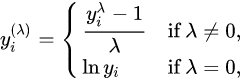


여-존슨

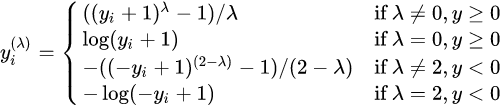

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#20세 이상인 데이터를 추출하고
df = df.loc[df["age"]>20]
df.shape

(82, 8)

In [ ]:
#'f1'컬럼을 결측치를 최빈값으로 채운 후,
print("결측값 제거 전 : ",df['f1'].isnull().sum())

df['f1'] = df['f1'].fillna(df['f1'].mode()[0])

print("결측값 제거 후 : ",df['f1'].isnull().sum())

결측값 제거 전 :  25
결측값 제거 후 :  0


In [ ]:
#f1 컬럼의 여-존슨 과 박스-콕스 값 구하기
##라이브러리 불러오기
from sklearn.preprocessing import power_transform

df['yj'] = power_transform(df[['f1']],method='yeo-johnson')
df['bc'] = power_transform(df[['f1']],method='box-cox')

df.loc[:,['yj','bc']].head(5)

,yj,bc
2,0.091977,0.091210
3,-0.591444,-0.591688
4,1.452505,1.452989
5,-0.151289,-0.151955
6,0.031681,0.030930


In [ ]:
#두 값의 차이
df['diff'] = df['yj']-df['bc']

#모두 더해서 절대값
import numpy as np
print(np.abs(df['diff'].sum()))

1.6930901125533637e-15


# **Task1-11. Min-Max 기준 상하위 5% 값**



*   주어진 데이터에서 'f5'컬럼을 min-max 스케일 변환한 후, 
*   상위 5%와 하위 5% 값의 합을 구하시오
*   데이터셋 : task1_2.csv


In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색
df.f5.isnull().sum()

0

In [ ]:
#min-max scaler 적용
#라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df['f5'].values.reshape(-1,1))

df['scaling'] = mm.transform(df['f5'].values.reshape(-1,1))

In [ ]:
#상위 5% 값과 하위5%값
import numpy as np
df5p = int(0.05*df.shape[0])

top = df.sort_values('scaling',ascending=False).head(df5p)
bottom = df.sort_values('scaling',ascending=True).head(df5p)

#quantile을 이용하는 방법도 있음
# top = df['scaling'].quantile(0.95)
# bottom = df['scaling'].quantile(0.05)

print(top)
print(bottom)

      id   age city    f1  f2   f3    f4         f5   scaling
10  id11  40.0   서울  68.0   0  NaN  ENFP  98.429899  1.000000
97  id98  39.0   경기  58.0   2  NaN  INFP  98.429899  1.000000
9   id10  95.0   서울  74.0   1  NaN  ISFP  98.429899  1.000000
76  id77  77.0   경기  31.0   0  NaN  INFP  98.429899  1.000000
98  id99   1.0   경기  47.0   0  NaN  ESFJ  97.381034  0.988166
      id   age city    f1  f2   f3    f4         f5   scaling
14  id15  22.0   서울  67.0   1  NaN  ENTP   9.796378  0.000000
6   id07  36.3   서울  60.0   1  NaN  ISFJ   9.796378  0.000000
90  id91   6.0   경기  72.0   0  NaN  INTP   9.796378  0.000000
44  id45  97.0   대구  88.0   0  NaN  ENFJ  13.049921  0.036708
54  id55  75.0   대구  63.0   2  NaN  ENTP  13.049921  0.036708


In [ ]:
#상위 5%값과 하위 5%값을 더하기
sum = top.scaling.sum()+bottom.scaling.sum()
sum

5.0615819224201255

# **Task1-12. 상위 10개, 하위 10개 차이**


*   주어진 데이터에서 상위 10개 국가의 접종률 평균과 
*   하위 10개 국가의 접종률 평균을 구하고, 
*   그 차이를 구해보세요 
*    (단, 100%가 넘는 접종률 제거, 소수 첫째자리까지 출력)
*   데이터셋 : task1_12.csv


In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
task = os.path.join(datadir,'task1_12.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색
df.head(5)

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40295077.0,1.113977
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40295077.0,1.167242
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40295077.0,1.182197
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40295077.0,1.189654
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40295077.0,1.190155


In [ ]:
#데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26623 entries, 0 to 26622
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               26623 non-null  int64  
 1   country                  26623 non-null  object 
 2   iso_code                 26623 non-null  object 
 3   date                     26623 non-null  object 
 4   total_vaccinations       26623 non-null  float64
 5   people_vaccinated        26623 non-null  float64
 6   people_fully_vaccinated  26623 non-null  float64
 7   New_deaths               26623 non-null  int64  
 8   population               26623 non-null  float64
 9   ratio                    26623 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
#국가별 접종률 평균구하기 
Ans = df.groupby('country').max() #시간에 따라 접종률이 올라감
Ans.head(5)

,Unnamed: 0,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
country,,,,,,,,,
Afghanistan,19,AFG,2021-11-27,5228706.0,4397449.0,3566192.0,86,40295077.0,10.913117
Albania,181,ALB,2021-12-23,2286235.0,1131547.0,1018549.0,18,2870177.0,39.424293
Algeria,196,DZA,2021-12-14,12437324.0,7019879.0,5554702.0,34,44996174.0,15.601058
Andorra,220,AND,2021-12-12,115709.0,56628.0,50551.0,2,77355.0,73.205352
Angola,258,AGO,2021-12-23,11164918.0,7423668.0,3741250.0,18,34472807.0,21.534852


In [ ]:
#오름차순으로 정렬
Ans = Ans.sort_values(by='ratio',ascending=False)
Ans.head(5)

,Unnamed: 0,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
country,,,,,,,,,
Gibraltar,9209,GIB,2021-12-22,108149.0,41162.0,40046.0,3,33698.0,122.149682
Malta,15892,MLT,2021-12-25,1031293.0,440447.0,435182.0,7,443519.0,99.307358
United Arab Emirates,25051,ARE,2021-12-24,22406584.0,9890348.0,9059559.0,15,10042529.0,98.484635
Cuba,6016,CUB,2021-12-24,29769267.0,10393893.0,9597707.0,98,11313280.0,91.873382
Brunei Darussalam,3879,BRN,2021-12-14,790506.0,405092.0,385414.0,5,443553.0,91.328883


In [ ]:
#이상치 제거 (Gambia의 ratio는 100을 초과함. 이상치로 판정 가능)
Ans = Ans[1:]
Ans.head(5)

,Unnamed: 0,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
country,,,,,,,,,
Malta,15892,MLT,2021-12-25,1031293.0,440447.0,435182.0,7,443519.0,99.307358
United Arab Emirates,25051,ARE,2021-12-24,22406584.0,9890348.0,9059559.0,15,10042529.0,98.484635
Cuba,6016,CUB,2021-12-24,29769267.0,10393893.0,9597707.0,98,11313280.0,91.873382
Brunei Darussalam,3879,BRN,2021-12-14,790506.0,405092.0,385414.0,5,443553.0,91.328883
Portugal,19888,PRT,2021-12-24,19055363.0,9180041.0,9080467.0,303,10152861.0,90.418267


In [ ]:
#상위 10개 국가의 평균과 하위 10개 국가의 평균을 빼기
top = Ans.ratio.head(10).mean()
bottom = Ans.ratio.tail(10).mean()

print(round(top-bottom,1))

88.4


# **Task1-13. 상관관계 구하기**

*   주어진 데이터에서 상관관계를 구하고, 
*   quality와의 상관관계가 가장 큰 값과, 가장 작은 값을 구한 다음 더하시오!
*   단, quality와 quality 상관관계 제외, 소수점 둘째 자리까지 출력항목 추가
*   데이터셋 : task1_13.csv



In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 불러오기
task = os.path.join(datadir,'task1_13.csv')
df = pd.read_csv(task)

In [ ]:
#데이터 탐색
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#상관관계 구하기
df_corr = df.corr()
df_corr = df_corr[:-1] #quality-quality 상관관계 제거
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
#'quality'의 상관관계가 가장 큰 값과 작은값 구하기
min = abs(df_corr['quality']).min()
max = abs(df_corr['quality']).max()

#부호가 음수일경우, 양수로 변경하여 계산
if df_corr.quality.min() < 0 :
  min = -min
if df_corr.quality.max() < 0 :
  max = -max

#결과값 출력
print(round(min+max,2))

0.46


# **Task1-14. 2개의 조건에 따른 상위값**



*   city와 f4를 기준으로 f5의 평균값을 구한 다음, 
*   f5를 기준으로 상위 7개 값을 모두 더해 출력하시오 
*   (소수점 둘째자리까지 출력)
*   데이터셋 : task1_2.csv



In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터셋 불러오기
task = os.path.join(datadir, 'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#데이터탐색
df.head(3)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986


In [ ]:
#city와 f4를 기준으로 f5의 평균구하기
ans = df.groupby(['city','f4']).f5.mean()
ans.head(3)

city  f4  
경기    ENTJ    51.693799
      ENTP    54.704075
      ESFJ    97.381034
Name: f5, dtype: float64

In [ ]:
#f5값을 기준으로 상위 7개 추출
ans = ans.sort_values(ascending=False).head(7)

#reset_index를 사용할 수도 있음
#ans = ans.reset_index().sort_values('f5',ascending=False).head(7)

ans

city  f4  
서울    ENFP    98.429899
경기    ESFJ    97.381034
서울    INTJ    91.297791
      ESTP    91.297791
      ISFP    91.057640
경기    INFP    90.531801
서울    INFJ    83.685380
Name: f5, dtype: float64

In [ ]:
#값을 다 더해서 소수점 둘째자리까지 출력
print(round(ans.sum(),2))

643.68


# **Task1-15. 슬라이싱 & 조건**



*   주어진 데이터 셋에서 age컬럼 상위 20개의 데이터를 구한 다음 
*   f1의 결측치를 중앙값으로 채운다.
*   그리고 f4가 ISFJ와 f5가 20 이상인 
*   f1의 평균값을 출력하시오!
*   데이터셋 : task1_2.csv



In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터셋 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#age 컬럼 상위 20개 데이터 구하기
df = df.sort_values('age',ascending=False).head(20)
df.head(5)

,id,age,city,f1,f2,f3,f4,f5
0,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
1,id37,100.0,부산,NaN,0,NaN,ESTP,33.308999
2,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
4,id92,97.0,경기,78.0,1,NaN,INFP,97.381034
3,id52,97.0,대구,82.0,1,NaN,ISFJ,90.496999


In [ ]:
#결측값 확인
df.f1.isnull().sum()

8

In [ ]:
#중앙값을 구해서 결측값에 채우기
med = df.f1.median()
df.f1 = df.f1.fillna(med)

df.f1.isnull().sum()

0

In [ ]:
#f4가 ISFJ와 f5가 20이상인 데이터 추출
df = df.loc[(df.f4 == 'ISFJ')&(df.f5 >= 20)]

#f1의 평균구하기
print(df.f1.mean())

73.875


# **Task1-16. 분산**



*   주어진 데이터 셋에서 f2가 0값인 데이터를 age를 기준으로 오름차순 정렬하고
*   앞에서 부터 20개의 데이터를 추출한 후 
*   f1 결측치(최소값)를 채우기 전과 후의 분산 차이를 계산하시오 (소수점 둘째 자리까지)
*   데이터셋 : task1_2.csv




In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터셋 불러오기
task = os.path.join(datadir,'task1_2.csv')
df = pd.read_csv(task)

In [ ]:
#데이터탐색
df.head(5)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [ ]:
#주어진 데이터 셋에서 f2가 0값인 데이터를 age를 기준으로 오름차순 정렬하고 상위20개 추출
df = df.loc[df['f2']==0].sort_values('age',ascending=True).head(20)

df.head(5)

,id,age,city,f1,f2,f3,f4,f5
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
85,id86,2.0,경기,NaN,0,NaN,ESTP,29.269869
56,id57,3.0,대구,111.0,0,NaN,ISFJ,29.269869
90,id91,6.0,경기,72.0,0,NaN,INTP,9.796378


In [ ]:
#f1 결측치(최소값)를 채우기 전과 후의 분산 
var1 = df.f1.var()
var1

351.7636363636363

In [ ]:
#f1 결측치에 최소값 채운 후 분산
df.f1 = df.f1.fillna(df.f1.min())

var2 = df.f1.var()
var2

313.32631578947377

In [ ]:
#분산간 차이를 계산하시오 (소수점 둘째 자리까지)
print(round(var1-var2,2))

38.44


# **Task1-17. 시계열데이터 1**



*   2022년 5월 sales의 중앙값을 구하시오
*   데이터셋 : task1_17.csv



In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
task = os.path.join(datadir,'task1_17.csv')
df = pd.read_csv(task)

In [ ]:
df.head(10)

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0
5,2022-01-06,1709350,177815,5340.0,1
6,2022-01-07,5306457,155749,3789.0,0
7,2022-01-08,1052325,53467,1793.0,0
8,2022-01-09,877848,54805,2110.0,0
9,2022-01-10,9112911,94024,2471.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    730 non-null    object 
 1   Sales   730 non-null    int64  
 2   PV      730 non-null    int64  
 3   UV      684 non-null    float64
 4   Events  730 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 28.6+ KB


In [ ]:
#데이트타입 유형으로 변경
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [ ]:
#2022년 5월인 데이터만 추출
df = df.loc[(df.Date.dt.month==5) & (df.Date.dt.year==2022)]
df.head(5)

,Date,Sales,PV,UV,Events
120,2022-05-01,976303,45225,1142.0,0
121,2022-05-02,7394853,262116,2959.0,1
122,2022-05-03,813181,23916,358.0,0
123,2022-05-04,318886,4733,292.0,0
124,2022-05-05,43980,47246,560.0,0


In [ ]:
#5월 Sales 중앙값
print(df.Sales.median())

1477685.0


# **Task1-18. 시계열데이터 2**

주어진 데이터에서 2022년 5월 주말과 평일의 sales컬럼 평균값 차이를 구하시오 
(소수점 둘째자리까지 출력, 반올림)

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
task = os.path.join(datadir,'task1_17.csv')
df = pd.read_csv(task)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    730 non-null    object 
 1   Sales   730 non-null    int64  
 2   PV      730 non-null    int64  
 3   UV      684 non-null    float64
 4   Events  730 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 28.6+ KB


In [ ]:
#date type 유형으로 변환
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [ ]:
#요일필드생성
df['dayofweek'] = df.Date.dt.dayofweek #Mon=0, Sun=6
df.head(5)

,Date,Sales,PV,UV,Events,dayofweek
0,2022-01-01,22711525,397349,4421.0,1,5
1,2022-01-02,36779,3969,2289.0,0,6
2,2022-01-03,13943875,373890,NaN,1,0
3,2022-01-04,8088593,142054,2157.0,0,1
4,2022-01-05,2395374,190684,NaN,0,2


In [ ]:
#주말 여부 확인
df['weekend'] = df['dayofweek'].apply(lambda x : x>=5,1,0)
df.head(5)

,Date,Sales,PV,UV,Events,dayofweek,weekend
0,2022-01-01,22711525,397349,4421.0,1,5,True
1,2022-01-02,36779,3969,2289.0,0,6,True
2,2022-01-03,13943875,373890,NaN,1,0,False
3,2022-01-04,8088593,142054,2157.0,0,1,False
4,2022-01-05,2395374,190684,NaN,0,2,False


In [ ]:
#2022년 5월 데이터만 추출
df = df.loc[(df.Date.dt.year == 2022) & (df.Date.dt.month==5)]

df.head(5)


,Date,Sales,PV,UV,Events,dayofweek,weekend
120,2022-05-01,976303,45225,1142.0,0,6,True
121,2022-05-02,7394853,262116,2959.0,1,0,False
122,2022-05-03,813181,23916,358.0,0,1,False
123,2022-05-04,318886,4733,292.0,0,2,False
124,2022-05-05,43980,47246,560.0,0,3,False


In [ ]:
#주말과 평일의 Sales 컬럼 평균
weekdays = df.loc[df.weekend==0].Sales.mean()
weekend = df.loc[df.weekend==1].Sales.mean()

#Sales 컬럼 평균 출력
print(round(weekend-weekdays,2))

3010339.1


# **Task1-19. 시계열데이터 3**

주어진 데이터에서 2022년 월별 Sales 합계 중 가장 큰 금액과

2023년 월별 Sales 합계 중 가장 큰 금액의 차이를 절대값으로 구하시오.

단 Events컬럼이 '1'인경우 80%의 Salse값만 반영함

(최종값은 소수점 반올림 후 정수 출력)

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
task = os.path.join(datadir,'task1_17.csv')
df = pd.read_csv(task)

In [ ]:
#Datetime 변환
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [ ]:
df.head(5)

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [ ]:
#Events가 1인 것은 Sales를 0.8 반영
def event_sales(x) :
  if x['Events'] == 1 : 
    x['newSales'] = x['Sales']*0.8
  else :
    x['newSales'] = x['Sales']
  return x

df = df.apply(lambda x : event_sales(x),axis=1)
df.head()

,Date,Sales,PV,UV,Events,newSales
0,2022-01-01,22711525,397349,4421.0,1,18169220.0
1,2022-01-02,36779,3969,2289.0,0,36779.0
2,2022-01-03,13943875,373890,NaN,1,11155100.0
3,2022-01-04,8088593,142054,2157.0,0,8088593.0
4,2022-01-05,2395374,190684,NaN,0,2395374.0


In [ ]:
#2022년 월별 Sales 합계
df2022 = df.loc[df.Date.dt.year==2022]
df2022 = df2022.groupby(df.Date.dt.month).newSales.sum()

df2022

Date
1     114475247.2
2     153453688.6
3     172483809.4
4     111466880.8
5     121801396.0
6     165288258.4
7     197145878.0
8     108173602.2
9     157752502.6
10    183253174.0
11     89359502.2
12    191208107.8
Name: newSales, dtype: float64

In [ ]:
#2023년 월별 Sales 합계
df2023 = df.loc[df.Date.dt.year==2023]
df2023 = df2023.groupby(df.Date.dt.month).newSales.sum()

df2023

Date
1     183416542.6
2     163354661.6
3     198438634.6
4     112160979.0
5     143287169.2
6     133574075.4
7     131657675.4
8     131982344.2
9     219594547.6
10    155630473.2
11    239619313.8
12    139131255.4
Name: newSales, dtype: float64

In [ ]:
#2022년 월별 Sales 최대값과, 2023년 월별 Sales 최대값의 차이를 절대값으로
print(round(abs(df2022.max()-df2023.max())))

42473436


# **Task1-20. 데이터병합**

### 고객과 잘 맞는 타입 추천 :)

basic1 데이터 중 'f4'를 기준으로 basic3 데이터 'f4'값을 기준으로 병합하고,

병합한 데이터에서 r2결측치를 제거한다음, 

앞에서 부터 20개 데이터를 선택하고 'f2'컬럼 합을 구하시오


basic1.csv: 고객 데이터

basic3.csv: 잘 어울리는 관계 데이터 (추천1:r1, 추천2:r2)

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
df1 = pd.read_csv(os.path.join(datadir,'basic1.csv'))
df3 = pd.read_csv(os.path.join(datadir,'basic3.csv'))

In [ ]:
#데이터 탐색
df1.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
 8   r1      100 non-null    object 
 9   r2      83 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.6+ KB


In [ ]:
df3.head()

,f4,r1,r2
0,INFP,ENFJ,ENTJ
1,ENFP,INFJ,NaN
2,INFJ,ENFP,ENTP
3,ENFJ,INFP,ISFP
4,INTJ,ENFP,ENTP


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f4      16 non-null     object
 1   r1      16 non-null     object
 2   r2      12 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [ ]:
#basic1 데이터 중 'f4'를 기준으로 basic3 데이터 'f4'값을 기준으로 병합하고,

df = df1.merge(df3, how='left',on='f4')
df.head()

,id,age,city,f1,f2,f3,f4,f5,r1,r2
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,INFP,ISFP
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,INFP,ISFP
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,ESFP,NaN
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,ENFJ,ENTJ
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,ESFP,ESTP


In [ ]:
#결측치 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
r1       0
r2      17
dtype: int64

In [ ]:
#병합한 데이터에서 r2결측치를 제거
df2 = df.dropna(subset=['r2'])

df2 = df[~df.r2.isnull()]
df2.isnull().sum()

id       0
age      0
city     0
f1      27
f2       0
f3      78
f4       0
f5       0
r1       0
r2       0
dtype: int64

In [ ]:
#앞에서 부터 20개 데이터를 선택하고 'f2'컬럼 합을 구하시오
df2 = df2.reset_index()

ans = df2.iloc[:20].f2.sum()
ans

15

# **Task1-21. 구간 분할**

### 나이 구간 나누기

basic1 데이터 중 'age'컬럼 이상치를 제거하고,

동일한 개수로 나이 순으로 3그룹으로 나눈 뒤 

각 그룹의 중앙값을 더하시오

(이상치는 음수(0포함), 소수점 값)

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
df = pd.read_csv(os.path.join(datadir,'basic1.csv'))

In [ ]:
#데이터탐색
df.sort_values('age',ascending=True).head()

,id,age,city,f1,f2,f3,f4,f5
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
69,id70,-9.0,경기,96.0,1,NaN,ISTP,48.431184
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
57,id58,0.0,대구,100.0,2,NaN,ESTP,33.308999
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [ ]:
#0이하 및 소수점 제거
df = df.loc[(df.age > 0) & (df.age%1 == 0)]
df.sort_values('age',ascending=True).head()

,id,age,city,f1,f2,f3,f4,f5
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
85,id86,2.0,경기,NaN,0,NaN,ESTP,29.269869
56,id57,3.0,대구,111.0,0,NaN,ISFJ,29.269869
90,id91,6.0,경기,72.0,0,NaN,INTP,9.796378


In [ ]:
df.shape

(90, 8)

In [ ]:
#나이순으로 동일한 갯수로 나누기
df = df.sort_values('age',ascending=True)

df1 = df.iloc[:30]
df2 = df.iloc[30:60]
df3 = df.iloc[60:]

print("갯수 : {} / {}/ {}".format(df1.shape,df2.shape,df3.shape))

갯수 : (30, 8) / (30, 8)/ (30, 8)


In [ ]:
#각 그룹의 중앙값 더하기
print(df1.age.median()+df2.age.median()+df3.age.median())

165.0


# **Task1-22. Time-Series4**

주어진 데이터(basic2.csv)에서 주 단위 Sales의 합계를 구하고, 

가장 큰 값을 가진 주와 작은 값을 가진 주의 차이를 구하시오(절대값)

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
df = pd.read_csv(os.path.join(datadir,'basic2.csv'))

In [ ]:
#데이터탐색
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [ ]:
#datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [ ]:
#주단위 행 생성
df['week'] = df['Date'].dt.week
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Date,Sales,PV,UV,Events,week
0,2022-01-01,22711525,397349,4421.0,1,52
1,2022-01-02,36779,3969,2289.0,0,52
2,2022-01-03,13943875,373890,NaN,1,1
3,2022-01-04,8088593,142054,2157.0,0,1
4,2022-01-05,2395374,190684,NaN,0,1


In [ ]:
#주단위 Sales 합계
weekSales = df.groupby([df['Date'].dt.year,df['week']]).Sales.sum()

weekSales.head()


Date  week
2022  1       33373822
      2       20754519
      3       21880751
      4       28878452
      5       36325160
Name: Sales, dtype: int64

In [ ]:
print(abs(weekSales.max()-weekSales.min()))

91639050


# **Task1-23. 중복데이터제거**

f1의 결측치를 채운 후 age 컬럼의 중복 제거 전과 후의 'f1' 중앙값 차이를 구하시오

- 결측치는 f1의 데이터 중 내림차순 정렬 후 10번째 값으로 채움

- 중복 데이터 발생시 뒤에 나오는 데이터를 삭제함
- 최종 결과값은 절대값으로 출력
- 데이터셋 : basic1.csv




In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
df = pd.read_csv(os.path.join(datadir,'basic1.csv'))

In [ ]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [ ]:
df.shape

(100, 8)

In [ ]:
#결측치 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [ ]:
#결측치는 f1의 데이터 중 내림차순 정렬 후 10번째 값으로 채움
alt = df.sort_values('f1',ascending=False).iloc[9]['f1']
alt

88.0

In [ ]:
#결측치 채우기
df['f1'] = df['f1'].fillna(alt)
df.f1.isnull().sum()

0

In [ ]:
#age 중복값 제거 전 f1의 중앙값
med1 = df['f1'].median()
med1

77.5

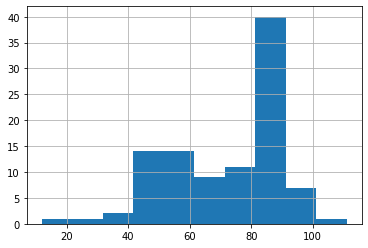

In [ ]:
df.f1.hist()

In [ ]:
#age 컬럼 중복 제거
df2 = df.drop_duplicates(subset='age',keep='first')
df2.shape

(71, 8)

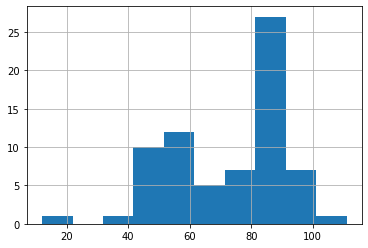

In [ ]:
df2.f1.hist()

In [ ]:
#age 중복값 제거 후 f1의 중앙값
med2 = df2['f1'].median()
med2

77.0

In [ ]:
#중앙값의 차이
print(abs(med1-med2))

0.5


# **Task1-24. Time-Series5**

주어진 데이터(basic2.csv)에서 새로운 컬럼(1일 이전 시차 컬럼)을 만들고,

 Events가 1이면서 Sales가 1000000이하인 조건에 맞는 새로운 컬럼 합을 구하시오

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
df = pd.read_csv(os.path.join(datadir,'basic2.csv'))

In [ ]:
#데이터탐색
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    730 non-null    object 
 1   Sales   730 non-null    int64  
 2   PV      730 non-null    int64  
 3   UV      684 non-null    float64
 4   Events  730 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 28.6+ KB


In [ ]:
#datetime으로 변경
df.Date = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [ ]:
df['dayBefore'] = df['Date'].shift(1)
df.head()

,Date,Sales,PV,UV,Events,dayBefore
0,2022-01-01,22711525,397349,4421.0,1,NaT
1,2022-01-02,36779,3969,2289.0,0,2022-01-01
2,2022-01-03,13943875,373890,NaN,1,2022-01-02
3,2022-01-04,8088593,142054,2157.0,0,2022-01-03
4,2022-01-05,2395374,190684,NaN,0,2022-01-04


# **MOCK EXAM-Task1. 작업형1 모의고사**

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
df = pd.read_csv(os.path.join(datadir,'basic1.csv'))

## 문제1
첫번째 데이터 부터 순서대로 50:50으로 데이터를 나누고, 

앞에서 부터 50%의 데이터(이하, A그룹)는 'f1'컬럼을 A그룹의 중앙값으로 채우고,

 뒤에서부터 50% 데이터(이하, B그룹)는 'f1'컬럼을 B그룹의 최대값으로 채운 후, 
 
 A그룹과 B그룹의 표준편차 합을 구하시오

단, 소수점 첫째자리까지 구하시오 (둘째자리에서 반올림)

In [ ]:
#데이터 탐색
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,68.0,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,68.0,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      100 non-null    float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


In [ ]:
df.shape

(100, 8)

In [ ]:
#첫번째 데이터 부터 순서대로 50:50으로 데이터를 나누고

dfA = df.iloc[:50]
dfB = df.iloc[50:]

print("DfA shape : {}, DfB shape : {}".format(dfA.shape, dfB.shape))

DfA shape : (50, 8), DfB shape : (50, 8)


In [ ]:
#앞에서 부터 50%의 데이터(이하, A그룹)는 'f1'컬럼을 A그룹의 중앙값으로 채우고,
#뒤에서부터 50% 데이터(이하, B그룹)는 'f1'컬럼을 B그룹의 최대값으로 채운 후

#A ; 중앙값구하기
medianA = dfA['f1'].median()

#B : 최대값구하기
maxB = dfB['f1'].max()

print("median : {} / max : {}".format(medianA, maxB))


median : 68.0 / max : 111.0


In [ ]:
#f1컬럼을 각각의 값으로채우기 (null 값에 채워보자)
dfA['f1'] = dfA['f1'].fillna(medianA)
dfB['f1'] = dfB['f1'].fillna(maxB)

dfB.f1.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


28.299304094710486

In [ ]:
print(round(dfA.f1.std()+dfB.f1.std(),1))

42.0


## 문제2

'f4'컬럼을 기준 내림차순 정렬과 'f5'컬럼기준 오름차순 정렬을 순서대로 다중 조건 정렬하고나서 

앞에서부터 10개의 데이터 중 'f5'컬럼의 최소값 찾고, 

이 최소값으로 앞에서 부터 10개의 'f5'컬럼 데이터를 변경함. 

그리고 'f5'컬럼의 평균값을 계산함

단 소수점 둘째자리까지 출력(셋째자리에서 반올림)

In [ ]:
#정렬하기
ans = df.sort_values(['f4','f5'],ascending=[False,True])
ans.head()

,id,age,city,f1,f2,f3,f4,f5
42,id43,23.0,대구,60.0,0,NaN,ISTP,29.269869
69,id70,-9.0,경기,96.0,1,NaN,ISTP,48.431184
16,id17,74.0,서울,NaN,1,NaN,ISTP,67.886373
22,id23,34.0,부산,75.0,1,NaN,ISTP,69.730313
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986


In [ ]:
#앞에서부터 10개의 데이터 중 'f5'컬럼의 최소값 찾고,
min = ans.head(10)['f5'].min()
min

17.25298557

In [ ]:
#이 최소값으로 앞에서 부터 10개의 'f5'컬럼 데이터를 변경함.
ans.head(10)['f5'] = min

ans.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,age,city,f1,f2,f3,f4,f5
42,id43,23.0,대구,60.0,0,NaN,ISTP,17.252986
69,id70,-9.0,경기,96.0,1,NaN,ISTP,17.252986
16,id17,74.0,서울,NaN,1,NaN,ISTP,17.252986
22,id23,34.0,부산,75.0,1,NaN,ISTP,17.252986
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
50,id51,36.0,대구,NaN,0,NaN,ISTJ,17.252986
65,id66,87.0,경기,NaN,1,NaN,ISFP,17.252986
20,id21,90.0,부산,NaN,1,NaN,ISFP,17.252986
70,id71,35.0,경기,84.0,2,NaN,ISFP,17.252986
67,id68,35.0,경기,45.0,2,NaN,ISFP,17.252986


In [ ]:
#그리고 'f5'컬럼의 평균값을 계산함
print(round(ans['f5'].mean(),2))

53.63


## 문제3
'age' 컬럼의 IQR방식을 이용한 이상치 수와 표준편차*1.5방식을 이용한 이상치 수 합을 구하시오


*   IQR방식 : Q1 - 1.5 IQR, Q3 + 1.5 IQR에서 벗어나는 영역을 이상치라고 판단함 (Q1은 데이터의 25%, Q3는 데이터의 75% 지점임)
*   표준편차1.5방식: 평균으로부터 '표준편차1.5'를 벗어나는 영역을 이상치라고 판단함



In [ ]:
#IQR 방식의 이상치 구하기
#Q1과 Q3구하기
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

#IQR = q3-q1
iqr = q3-q1

print("Q1 : {} , Q3 : {}, IQR ; {}".format(q1,q3,iqr))

Q1 : 26.875 , Q3 : 77.0, IQR ; 50.125


In [ ]:
#IQR 방식의 이상치 구하기
df1 = df.loc[(df.age >= q3+1.5*iqr)|(df.age <= q1-1.5*iqr)]
df1.shape

(0, 8)

In [ ]:
#평균으로부터 표준편차 1.5 방식 이상치 구하기
df2 = df.loc[(df.age > df.age.mean()+1.5*df.age.std()) |(df.age < df.age.mean()-1.5*df.age.std()) ]
df2.shape

(14, 8)

In [ ]:
print(df1.shape[0]+df2.shape[0])

14


# **Task2_ Tutalrial Baseline**

백화점 고객의 1년 간 구매 데이터를 활용해


데이터 전처리

Feature Engineering

모델링 (분류 알고리즘 사용)

하이퍼파라미터 튜닝 (초매개변수 최적화)

모형 앙상블

csv제출

In [ ]:
#라이브러리 불러오기
import os
import pandas as pd

#데이터 가져오기
X_train = pd.read_csv(os.path.join(datadir,'task2_1','X_train.csv'),encoding='euc-kr')
X_test = pd.read_csv(os.path.join(datadir,'task2_1','X_test.csv'),encoding='euc-kr')
y_train = pd.read_csv(os.path.join(datadir,'task2_1','y_train.csv'),encoding='euc-kr')

In [ ]:
#EDA - HIDI
X_train.head(3)

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
X_train.shape, y_train.shape, X_test.shape 

((3500, 10), (3500, 2), (2482, 10))

In [ ]:
#결측치 확인
X_train.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [ ]:
X_test.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [ ]:
y_train.isnull().sum()

cust_id    0
gender     0
dtype: int64

**데이터 전처리**

In [ ]:
#결측값 0으로 채우기
X_train['환불금액'] = X_train['환불금액'].fillna(0)
X_test['환불금액'] = X_test['환불금액'].fillna(0)

X_train['환불금액'].isnull().sum(), X_test['환불금액'].isnull().sum(), 

(0, 0)

In [ ]:
#customer ID 삭제
X_train = X_train.drop(['cust_id'],axis=1)
cust_id = X_test.pop('cust_id')

**피처 엔지니어링**

In [ ]:
#Label Encoding (범주형 변수 레이블링)
from sklearn.preprocessing import LabelEncoder

#주구매상품
le = LabelEncoder()
X_train['주구매상품'] =le.fit_transform(X_train['주구매상품'])
X_test['주구매상품'] = le.transform(X_test['주구매상품'])

#주구매지점
le2 = LabelEncoder()
X_train['주구매지점'] = le2.fit_transform(X_train['주구매지점'])
X_test['주구매지점'] = le2.transform(X_test['주구매지점'])

In [ ]:
X_train.head()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,68282840,11264000,6860000.0,5,0,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,21,19,2,1.500000,0.000000,1
2,3197000,1639000,0.0,6,1,2,2.000000,0.000000,1
3,16077620,4935000,0.0,5,2,18,2.444444,0.318182,16
4,29050000,24000000,0.0,15,8,2,1.500000,0.000000,85


**모델링 & 하이퍼파라미터 튜닝**

In [ ]:
#모델링 & 하이퍼 파라미터 튜닝 & 앙상블
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2022)
model.fit(X_train,y_train['gender'])
print(model.score(X_train,y_train['gender']))
predictions = model.predict_proba(X_test)

0.6874285714285714


In [ ]:
#X_test의 각 행에 대한 비율 검토
predictions[:,1]

array([0.43567157, 0.19725558, 0.17732635, ..., 0.43703219, 0.36002886,
       0.54383742])

In [ ]:
#CSV생성
output = pd.DataFrame({'cust_id':cust_id,'gender':predictions[:,1]})

output.head()

,cust_id,gender
0,3500,0.435672
1,3501,0.197256
2,3502,0.177326
3,3503,0.420662
4,3504,0.484252


In [ ]:
output.to_csv("19941023.csv",index=False)

In [ ]:
#csv 확인
pd.read_csv("19941023.csv")

,cust_id,gender
0,3500,0.435672
1,3501,0.197256
2,3502,0.177326
3,3503,0.420662
4,3504,0.484252
...,...,...
2477,5977,0.474432
2478,5978,0.511048
2479,5979,0.437032
2480,5980,0.360029


# **Task2-1. 타이타닉_Simple Baseline**

### **생존여부 예측모델 만들기**
학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오

(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)



---



**(가) 제공 데이터 목록**

- y_train: 생존여부(학습용)

- X_trian, X_test : 승객 정보 (학습용 및 평가용)


**(나) 데이터 형식 및 내용 **

- y_trian (712명 데이터)


시험환경 세팅은 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임


---

**유의사항**

성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.

수험번호.csv파일이 만들어지도록 코드를 제출한다.

제출한 모델의 성능은 accuracy로 평가함

**시험환경 셋팅**

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv(os.path.join(datadir,'task2_1','train.csv'))
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

**시험 시작**

In [ ]:
#라이브러리 불러오기
import pandas as pd

In [ ]:
#데이터 탐색
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


-> Name, Sex, Ticket, Cabin, Embarked 필드는 Object  type이므로 변경필요

In [ ]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          542
Embarked         1
dtype: int64

In [ ]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             40
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          145
Embarked         1
dtype: int64

In [ ]:
y_train.shape

(712, 2)

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  712 non-null    int64
 1   Survived     712 non-null    int64
dtypes: int64(2)
memory usage: 16.7 KB


In [ ]:
#생존비율
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

**불필요한 필드 제거**

In [ ]:
#불필요한 필드 제거
passengerId = X_test.pop("PassengerId")
passengerId

210    211
876    877
666    667
819    820
736    737
      ... 
494    495
871    872
530    531
157    158
45      46
Name: PassengerId, Length: 179, dtype: int64

In [ ]:
#PassengerID 필드 제거
X_train = X_train.drop(['PassengerId'],axis=1)
y_train = y_train.drop(['PassengerId'],axis=1)

In [ ]:
#Name 필드 제거
X_train = X_train.drop(['Name'],axis=1)
X_test = X_test.drop(['Name'],axis=1)

**결측값 제거**

In [ ]:
#결측치 제거
#Age, Cabin, Embarked

#Cabin 필드
X_train["Cabin"] = X_train['Cabin'].fillna("NoData")
X_test["Cabin"] = X_test['Cabin'].fillna("NoData")

#확인
print("Cabin 결측값 : X_train - {}, X_test - {}".format(X_train.Cabin.isnull().sum(), X_test.Cabin.isnull().sum()))

Cabin 결측값 : X_train - 0, X_test - 0


In [ ]:
#Embark 필드
X_train["Embarked"] = X_train['Embarked'].fillna("NoData")
X_test["Embarked"] = X_test['Embarked'].fillna("NoData")
#확인
print("Embarked 결측값 : X_train - {}, X_test - {}".format(X_train.Embarked.isnull().sum(), X_test.Embarked.isnull().sum()))

Embarked 결측값 : X_train - 0, X_test - 0


In [ ]:
#Age 필드
#--> Training과 Test의 중앙값으로 na 채우기
AgeTotal = pd.concat([X_train.Age, X_test.Age])

X_train['Age'] = X_train['Age'].fillna(AgeTotal.median())
X_test['Age'] = X_test['Age'].fillna(AgeTotal.median())

#확인
print("Age 결측값 : X_train - {}, X_test - {}".format(X_train.Age.isnull().sum(), X_test.Age.isnull().sum()))

Age 결측값 : X_train - 0, X_test - 0


In [ ]:
#문자형 필드 인코딩 변경
#Name, Sex, Ticket, Cabin, Embarked
X_train.columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_test['Sex'] = le.transform(X_test['Sex'])

X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,3,1,29.0,0,0,343276,8.0500,NoData,S
103,3,1,33.0,0,0,7540,8.6542,NoData,S
577,1,0,39.0,1,0,13507,55.9000,E44,S


In [ ]:
#Embarked 필드
le2 = LabelEncoder()
X_train['Embarked'] = le2.fit_transform(X_train['Embarked'])
X_test['Embarked'] = le2.fit_transform(X_test['Embarked'])

모델링 대상 변수 추출

In [ ]:
#결측값이 너무 많은 Cabin 필드는 안쓰는게 나음
#
features = ['Pclass','Sex','SibSp','Parch','Embarked','Fare','Age']

X = pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])

In [ ]:
X.shape, test.shape, y_train.shape

((712, 7), (179, 7), (712, 1))

모델 및 평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=2021)
model.fit(X,y_train)
predictions = model.predict(test)

model.score(X,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9157303370786517

Output 만들기

In [ ]:
output = pd.DataFrame({'PassengerId':passengerId, 'Suvived':predictions})
output.head()


,PassengerId,Suvived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0


In [ ]:
output.to_csv("1994103.csv",index=False)

**결과채점**

In [ ]:
model.score(test, y_test['Survived'])

0.7653631284916201

# **Task2-2. Pima Indians Diabetes (피마 인디언 당뇨병)**

### 당뇨병 여부 판단
- 이상치 처리 (Glucose, BloodPressure, SkinThickness, Insulin, BMI가 0인 값)


---


### [참고]작업형2 문구
-출력을 원하실 경우 print() 함수 활용

-예시) print(df.head())

-getcwd(), chdir() 등 작업 폴더 설정 불필요

-파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가


---


### 데이터 파일 읽기 예제

-import pandas as pd

-X_test = pd.read_csv("data/X_test.csv")

-X_train = pd.read_csv("data/X_train.csv")

-y_train = pd.read_csv("data/y_train.csv")

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv(os.path.join(datadir,'diabetes.csv'))
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')


In [ ]:
#행,열 수 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

**데이터 탐색**

In [ ]:
X_train.head(3)

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [ ]:
X_train.isnull().sum()

id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
X_train.columns

Index(['id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
X_test.head(3)

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
258,258,1,193,50,16,375,25.9,0.655,24
220,220,0,177,60,29,478,34.6,1.072,21
438,438,1,97,70,15,0,18.2,0.147,21


In [ ]:
y_train.head(3)

,id,Outcome
147,147,0
344,344,0
390,390,0


**데이터 전처리**

불필요한 필드 제거

In [ ]:
#X_test의 ID 필드 제거
testId = X_test.pop('id')
testId.head(3)

258    258
220    220
438    438
Name: id, dtype: int64

In [ ]:
#X_train, y_test의 ID 필드 제거
X_train = X_train.drop(['id'],axis=1)
y_train = y_train.drop(['id'],axis=1)

X_train.shape, y_train.shape

((614, 8), (614, 1))

이상치 처리

Glucose, BloodPressure, SkinThickness, Insulin, BMI가 0인 값

In [ ]:
#이상치 필드
flds = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

#이상치 갯수 확인
for fld in flds :
  train0 = X_train.loc[X_train[fld]==0].shape[0]
  test0 = X_test.loc[X_test[fld]==0].shape[0]
  print("{} 필드 이상치 레코드 갯수 : X_train-{}, X_test-{}".format(fld, train0, test0))

Glucose 필드 이상치 레코드 갯수 : X_train-5, X_test-0
BloodPressure 필드 이상치 레코드 갯수 : X_train-31, X_test-4
SkinThickness 필드 이상치 레코드 갯수 : X_train-175, X_test-52
Insulin 필드 이상치 레코드 갯수 : X_train-287, X_test-87
BMI 필드 이상치 레코드 갯수 : X_train-9, X_test-2


--> Glucose 필드는 train에만 결측값이 있다. 그러므로 train에서 해당 레코드를 삭제하도록 한다.

In [ ]:
#Glucose 필드 삭제
del_idx = X_train.loc[X_train.Glucose == 0].index
print(del_idx)

print("Glucose 인덱스 삭제 전 : X_train.shape - {}, y_train.shape - {}".format(X_train.shape, y_train.shape))
X_train = X_train.drop(index=del_idx,axis=0)
y_train = y_train.drop(index=del_idx,axis=0)
print("Glucose 인덱스 삭제 후 : X_train.shape - {}, y_train.shape - {}".format(X_train.shape, y_train.shape))


Int64Index([182, 75, 342, 502, 349], dtype='int64')
Glucose 인덱스 삭제 전 : X_train.shape - (614, 8), y_train.shape - (614, 1)
Glucose 인덱스 삭제 후 : X_train.shape - (609, 8), y_train.shape - (609, 1)


-->  'BloodPressure', 'SkinThickness','Insulin', 'BMI' 필드는 평균값으로 대체

In [ ]:
#이상치 필드 - 평균대치
flds = ['BloodPressure', 'SkinThickness','Insulin', 'BMI']

flds_mean = X_train[flds].mean()
X = X_train
X[flds] = X[flds].replace(0,flds_mean)


In [ ]:
#이상치 필드
flds = ['BloodPressure', 'SkinThickness','Insulin', 'BMI']

#이상치 갯수 확인
for fld in flds :
  train0 = X.loc[X[fld]==0].shape[0]
  test0 = X_test.loc[X_test[fld]==0].shape[0]
  print("{} 필드 이상치 레코드 갯수 : X_train-{}, X_test-{}".format(fld, train0, test0))

BloodPressure 필드 이상치 레코드 갯수 : X_train-0, X_test-4
SkinThickness 필드 이상치 레코드 갯수 : X_train-0, X_test-52
Insulin 필드 이상치 레코드 갯수 : X_train-0, X_test-87
BMI 필드 이상치 레코드 갯수 : X_train-0, X_test-2


**데이터 엔지니어링**

데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
flds = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X[flds] = ss.fit_transform(X[flds])
X_test[flds] = ss.transform(X_test[flds])

**데이터 학습**

In [ ]:
#RandomForest 사용
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=2021)
model.fit(X,y_train)
predictions = model.predict(X_test)

model.score(X,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8522167487684729

In [ ]:
#RandomForest 모델결과
model.score(X_test, y_test['Outcome'])

0.7467532467532467

In [ ]:
#SVM 사용
from sklearn.svm import SVC

model2 = SVC(random_state=2022)
model2.fit(X,y_train)
predictions = model2.predict(X_test)

model2.score(X,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8292282430213465

In [ ]:
#SVM 사용결과
model2.score(X_test, y_test['Outcome'])

0.7402597402597403

**output 생성하기**

**채점**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:,1]
y_proba

array([0.48660556, 0.63551653, 0.03238823, 0.7089877 , 0.29343374,
       0.27101227, 0.54829073, 0.0420846 , 0.26325606, 0.39527363,
       0.52472622, 0.18706372, 0.09527461, 0.52803229, 0.07801252,
       0.3247606 , 0.21407387, 0.41860564, 0.69594854, 0.40601021,
       0.28878559, 0.76385471, 0.08750639, 0.493386  , 0.37619305,
       0.23618434, 0.69024486, 0.16407929, 0.27437865, 0.54425919,
       0.4235999 , 0.26548796, 0.49261897, 0.02947275, 0.14792427,
       0.25143066, 0.11074421, 0.06734222, 0.10906176, 0.28924134,
       0.28435785, 0.19268931, 0.22671752, 0.19931915, 0.17569956,
       0.12431257, 0.41477311, 0.12202308, 0.16584649, 0.38334768,
       0.49988   , 0.39392044, 0.33319512, 0.32701245, 0.39159308,
       0.08586532, 0.01539467, 0.51269748, 0.64254519, 0.22390189,
       0.27514021, 0.32596212, 0.40889039, 0.27753894, 0.3726464 ,
       0.21633459, 0.26738049, 0.22674023, 0.26708022, 0.31139521,
       0.35888473, 0.06743138, 0.3451738 , 0.78928507, 0.01687

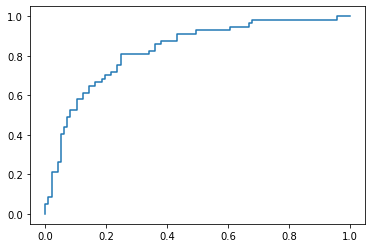

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test.iloc[:,1],y_proba)
plt.plot(fpr,tpr,label="roc-auc")

# **Task2-3. Adult Census Income Tutorial**

### 성인 인구조사 소득 예측

- age: 나이
- workclass: 고용 형태
- fnlwgt: 사람의 대표성을 나타내는 가중치(final weight)
- education: 교육 수준
- education.num: 교육 수준 수치
- marital.status: 결혼 상태
- occupation: 업종
- relationship: 가족 관계
- race: 인종
- sex: 성별
- capital.gain: 양도 소득
- capital.loss: 양도 손실
- hours.per.week: 주당 근무 시간
- native.country: 국적
- income: 수익 (예측해야 하는 값)

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv(os.path.join(datadir,'task2_1','adult.csv'))
X_train, X_test, y_train, y_test = exam_data_load(df, target='income', null_name='?')


In [ ]:
#Shape확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 15), (6513, 15), (26048, 2), (6513, 2))

## 사용자 코딩

### 데이터 탐색

In [ ]:
#X_train 데이터 탐색
X_train.head(3)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
7632,7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
27878,27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States


In [ ]:
X_train.info()

#==> workclass, education, marital,status, occupation, relationship, race, sex, native.country 인코딩
#--> education은 education.num 을 대신 사용할 수 있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 21851 to 25716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26048 non-null  int64 
 1   age             26048 non-null  int64 
 2   workclass       24592 non-null  object
 3   fnlwgt          26048 non-null  int64 
 4   education       26048 non-null  object
 5   education.num   26048 non-null  int64 
 6   marital.status  26048 non-null  object
 7   occupation      24585 non-null  object
 8   relationship    26048 non-null  object
 9   race            26048 non-null  object
 10  sex             26048 non-null  object
 11  capital.gain    26048 non-null  int64 
 12  capital.loss    26048 non-null  int64 
 13  hours.per.week  26048 non-null  int64 
 14  native.country  25587 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.2+ MB


In [ ]:
#결측치 확인
X_train.isnull().sum()
#--> workcalss, occupation, native.country 필드에 결측값 존재

id                   0
age                  0
workclass         1456
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1463
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     461
dtype: int64

In [ ]:
#X_train과 X_test의 결측치 확인
flds = ["workclass", "occupation", "native.country"]

for fld in flds :
  print("X_train 결측값 : {0} 필드 - {1}/{2} ({3}%)".format(fld,X_train[fld].isnull().sum(),X_train.shape[0],round(X_train[fld].isnull().sum()/X_train.shape[0],2)))
  print("X_test 결측값 : {0} 필드 - {1}/{2} ({3}%)".format(fld,X_test[fld].isnull().sum(),X_test.shape[0],round(X_test[fld].isnull().sum()/X_test.shape[0],2)))

X_train 결측값 : workclass 필드 - 1456/26048 (0.06%)
X_test 결측값 : workclass 필드 - 380/6513 (0.06%)
X_train 결측값 : occupation 필드 - 1463/26048 (0.06%)
X_test 결측값 : occupation 필드 - 380/6513 (0.06%)
X_train 결측값 : native.country 필드 - 461/26048 (0.02%)
X_test 결측값 : native.country 필드 - 122/6513 (0.02%)


In [ ]:
#X_train내 이상치 확인
cols = ["age",'fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

for col in cols :
  #ESD
  esdMin = X_train[col].mean()-3*(X_train[col].std())
  esdMax = X_train[col].max()+3*(X_train[col].std())
  esdCnt = X_train.loc[(X_train[col] < esdMin) | (X_train[col] > esdMax)].shape[0]
  
  #IQR
  IQR = X_train[col].quantile(0.75)-X_train[col].quantile(0.25)
  iqrMin = X_train[col].quantile(0.25)-1.5*IQR
  iqrMax = X_train[col].quantile(0.75)+1.5*IQR
  iqrCnt = X_train.loc[(X_train[col] < iqrMin) | (X_train[col] > iqrMax)].shape[0]

  #minus val
  minusCnt = X_train.loc[X_train[col] < 0].shape[0]

  print("{} 필드 이상치 --> ESD - {} / IQR - {} / 음수 - {}".format(col,esdCnt, iqrCnt, minusCnt))

age 필드 이상치 --> ESD - 0 / IQR - 108 / 음수 - 0
fnlwgt 필드 이상치 --> ESD - 0 / IQR - 803 / 음수 - 0
education.num 필드 이상치 --> ESD - 174 / IQR - 944 / 음수 - 0
capital.gain 필드 이상치 --> ESD - 0 / IQR - 2182 / 음수 - 0
capital.loss 필드 이상치 --> ESD - 0 / IQR - 1235 / 음수 - 0
hours.per.week 필드 이상치 --> ESD - 69 / IQR - 7205 / 음수 - 0


In [ ]:
#hours.per.week 필드 상세 확인
X_train.loc[X_train["hours.per.week"] >= 24*7].shape[0]

0

In [ ]:
#y_train 검토
y_train.head(3)

,id,income
21851,21851,>50K
7632,7632,<=50K
27878,27878,<=50K


### 데이터 전처리
- 불필요한 피처(필드) 제거
- 결측값 제거
- 이상치 제거
- 문자 필드 인코딩

In [ ]:
#불필요한 ID, Education 필드 제거
X_train = X_train.drop('id',axis=1)
y_train = y_train.drop('id',axis=1)

X_train = X_train.drop('education',axis=1)
X_test = X_test.drop('education',axis=1)

#X_test의 id는 별도로 저장
testID = X_test.pop("id")
testID.shape

(6513,)

In [ ]:
#결측값 치환
flds = ["workclass", "occupation", "native.country"]

for fld in flds :
  X_train[fld] = X_train[fld].fillna("NoData")
  X_test[fld] = X_test[fld].fillna("NoData")


In [ ]:
#이상치 제거 ==> 작업 안해도 될 것같음
#대신 수치형 데이터 MinMaxScaler 사용
from sklearn.preprocessing import MinMaxScaler

cols = ["age",'fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

for col in cols :
  mm = MinMaxScaler()
  X_train[col] = mm.fit_transform(X_train[col].values.reshape(-1,1))
  X_test[col] = mm.transform(X_test[col].values.reshape(-1,1))
  print("{} -- MinMaxScaler Processing Finished..!".format(col))


age -- MinMaxScaler Processing Finished..!
fnlwgt -- MinMaxScaler Processing Finished..!
education.num -- MinMaxScaler Processing Finished..!
capital.gain -- MinMaxScaler Processing Finished..!
capital.loss -- MinMaxScaler Processing Finished..!
hours.per.week -- MinMaxScaler Processing Finished..!


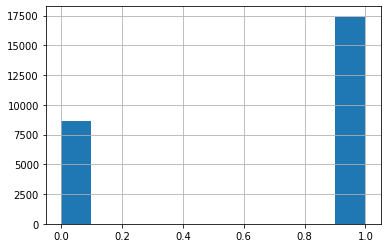

In [ ]:
#문자형 데이터 인코딩하기
#대상 필드 : workclass, marital,status, occupation, relationship, race, sex, native.country 인코딩

#sex는 male/ female에 따라 1/0 구분

X_train["sex"] = X_train["sex"].map(lambda x : 1 if x=="Male" else 0)
X_test["sex"] = X_test["sex"].map(lambda x : 1 if x=="Male" else 0)

X_train['sex'].hist()

In [ ]:
#나머지는 Label 인코딩 후 OneHot 인코딩 수행할 것
#대상 필드 : workclass, marital,status, occupation, relationship, race, native.country 인코딩
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

cols = ["workclass", "marital.status", "occupation", "relationship", "race", "native.country"]

for col in cols :
  le = LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.transform(X_test[col])
  print("{} Lable Encoding Finished..".format(col))


workclass Lable Encoding Finished..
marital.status Lable Encoding Finished..
occupation Lable Encoding Finished..
relationship Lable Encoding Finished..
race Lable Encoding Finished..
native.country Lable Encoding Finished..


### 모델링
- RandomForest 등..

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=2000)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(max_depth=10, random_state=2000)

In [ ]:
#Score 확인하기
rfc.score(X_train,y_train)

0.8698556511056511

In [ ]:
y_predict = rfc.predict(X_test)

In [ ]:
rfc.score(X_test,y_test.iloc[:,1])

0.8628896054045755

In [ ]:
y_test.head()

,id,income
20901,20901,<=50K
14170,14170,>50K
1776,1776,>50K
30428,30428,<=50K
8602,8602,<=50K


### 결과 CSV 만들기

In [ ]:
output = pd.DataFrame({"id":testID, "outcome":y_predict})
output.head()

,id,outcome
20901,20901,<=50K
14170,14170,<=50K
1776,1776,>50K
30428,30428,<=50K
8602,8602,<=50K


In [ ]:
output.to_csv("19941023.csv",index=False)

In [ ]:
from sklearn.metrics import accuracy_score
# y_test = (y_test['income'] != '<=50K').astype(int)
y_predict = (y_predict != '<=50K').astype(int)
print('accuracy score:', (accuracy_score(y_test, y_predict)))

accuracy score: 0.8628896054045755


## 샘플 답안

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# 피처 구분
# Numeric features
numeric_features = [
                    'age',
                    'fnlwgt', 
                    'education.num',
                    'capital.gain', 
                    'capital.loss', 
                    'hours.per.week',                     
                   ]

# Categorical features
cat_features = [
                 'workclass',              
                 'education',            
                 'marital.status', 
                 'occupation', 
                 'relationship', 
                 'race', 
                 'sex',
                 'native.country'
]

In [ ]:
X_train[numeric_features].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.610335,1.895741e+05,10.082118,1081.193796,88.477695,40.420224
std,13.628346,1.043848e+05,2.574608,7404.962675,404.689981,12.354707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182472e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365968e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X_train[cat_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,24592,26048,26048,24585,26048,26048,26048,25587
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
freq,18160,8408,11987,3323,10558,22270,17400,23381


In [ ]:
X_train.isnull().sum()

id                   0
age                  0
workclass         1456
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1463
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     461
dtype: int64

In [ ]:
X_test.isnull().sum()

id                  0
age                 0
workclass         380
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        380
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    122
dtype: int64

In [ ]:
X_train['workclass'].value_counts()

Private             18160
Self-emp-not-inc     2049
Local-gov            1648
State-gov            1037
Self-emp-inc          909
Federal-gov           770
Without-pay            12
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
X_train['occupation'].value_counts()

Exec-managerial      3323
Prof-specialty       3306
Craft-repair         3296
Adm-clerical         3037
Sales                2898
Other-service        2624
Machine-op-inspct    1584
Transport-moving     1257
Handlers-cleaners    1080
Farming-fishing       786
Tech-support          746
Protective-serv       521
Priv-house-serv       119
Armed-Forces            8
Name: occupation, dtype: int64

In [ ]:
X_train['native.country'].value_counts()

United-States                 23381
Mexico                          516
Philippines                     158
Germany                         108
Canada                           88
Puerto-Rico                      87
El-Salvador                      76
India                            73
Cuba                             73
England                          69
Italy                            63
South                            62
Jamaica                          59
Vietnam                          57
China                            57
Guatemala                        54
Dominican-Republic               51
Japan                            49
Poland                           47
Columbia                         44
Taiwan                           37
Haiti                            37
Iran                             34
Portugal                         32
Peru                             29
Nicaragua                        27
Ecuador                          25
Greece                      

In [ ]:
#결측치는 최빈값과 차이가 크면 최빈값으로 값이 비슷하면 별도의 값으로 대체함

def data_fillna(df):
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
    df['occupation'] = df['occupation'].fillna("null")
    df['native.country'] = df["native.country"].fillna(df['native.country'].mode()[0])
    return df

X_train = data_fillna(X_train)
X_test = data_fillna(X_test)

X_train.isnull().sum()


id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [ ]:
# 라벨인코딩
from sklearn.preprocessing import LabelEncoder

all_df = pd.concat([X_train.assign(ind="train"), X_test.assign(ind="test")])
le = LabelEncoder()
all_df[cat_features] = all_df[cat_features].apply(le.fit_transform)

X_train = all_df[all_df['ind'] == 'train']
X_train = X_train.drop('ind',axis=1)
X_train

X_test = all_df[all_df['ind'] == 'test']
X_test = X_test.drop('ind',axis=1)
X_test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
20901,20901,58,3,114495,11,9,2,3,0,4,1,0,0,40,38
14170,14170,46,3,247043,11,9,2,13,0,4,1,0,0,40,38
1776,1776,67,1,103315,12,14,4,3,2,4,0,15831,0,72,38
30428,30428,18,3,165532,15,10,4,11,3,4,1,0,0,15,38
8602,8602,26,6,58039,15,10,2,7,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,31222,22,3,199426,15,10,4,14,1,4,0,0,0,40,38
10861,10861,41,3,155106,11,9,2,5,0,4,1,0,0,40,38
8929,8929,32,3,153078,9,13,4,7,1,1,1,0,0,40,34
2066,2066,48,6,171926,14,15,2,9,0,4,1,15024,0,50,38


In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
X_train

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,21851,0.260274,3,0.156011,9,0.800000,2,2,0,4,1,0.000000,0.0,0.500000,38
7632,7632,0.493151,3,0.062255,12,0.866667,0,9,1,4,0,0.000000,0.0,0.397959,38
27878,27878,0.027397,3,0.129566,15,0.600000,4,12,1,4,0,0.000000,0.0,0.244898,38
14121,14121,0.041096,3,0.061343,11,0.533333,4,5,3,4,1,0.000000,0.0,0.295918,38
32345,32345,0.506849,6,0.085958,11,0.533333,2,9,0,4,1,0.000000,0.0,0.397959,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,2669,0.383562,3,0.118910,12,0.866667,0,3,4,4,1,0.074301,0.0,0.704082,38
17536,17536,0.260274,3,0.110039,1,0.400000,0,13,1,4,1,0.000000,0.0,0.397959,38
6201,6201,0.410959,3,0.178669,7,0.733333,6,7,3,4,0,0.000000,0.0,0.346939,38
27989,27989,0.452055,5,0.125113,10,1.000000,2,9,0,4,1,0.000000,0.0,0.224490,38


In [ ]:
y_train['income'].value_counts()

<=50K    19756
>50K      6292
Name: income, dtype: int64

In [ ]:
# target값 변경
y = (y_train['income'] != '<=50K').astype(int)
y.value_counts()

0    19756
1     6292
Name: income, dtype: int64

In [ ]:
# 학습용 데이터와 검증용 데이터로 구분
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, test_size=0.15, random_state=2021)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((22140, 15), (3908, 15), (22140,), (3908,))

In [ ]:
X_tr.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1437,1437,0.191781,3,0.216501,9,0.800000,4,3,1,4,0,0.0,0.323232,0.397959,38
7151,7151,0.287671,5,0.127591,11,0.533333,2,2,0,4,1,0.0,0.000000,0.602041,38
30296,30296,0.424658,3,0.217452,9,0.800000,2,9,0,4,1,0.0,0.000000,0.346939,38
15372,15372,0.452055,3,0.142442,11,0.533333,2,2,0,4,1,0.0,0.000000,0.397959,38
13800,13800,0.178082,3,0.187243,15,0.600000,4,5,1,4,1,0.0,0.000000,0.397959,38


In [ ]:
# id 삭제
X_tr = X_tr.drop('id', axis=1)
X_val = X_val.drop('id', axis=1)

In [ ]:
# id 삭제된 것 확인
X_tr.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1437,0.191781,3,0.216501,9,0.8,4,3,1,4,0,0.0,0.323232,0.397959,38


In [ ]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score:', (accuracy_score(y_val, pred)))

accuracy score: 0.8119242579324463


In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score:', (accuracy_score(y_val, pred)))

accuracy score: 0.8480040941658137


In [ ]:
# test데이터 예측 (pop을 활용하면 값을 넘겨주고 삭제 됨)
X_test_id = X_test.pop('id')
pred = model.predict(X_test)

In [ ]:
# csv생성
output = pd.DataFrame({'id': X_test_id, 'income':pred})
output.to_csv("000000.csv", index=False)
output.head()

,id,income
20901,20901,0
14170,14170,0
1776,1776,1
30428,30428,0
8602,8602,0


In [ ]:
#채점 - 사용자 확인 불가
y_test = (y_test['income'] != '<=50K').astype(int)
from sklearn.metrics import accuracy_score
print('accuracy score:', (accuracy_score(y_test, pred)))

accuracy score: 0.8569015814524796


# **Task2-4. House Prices (Regression)**

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv(os.path.join(datadir,'task2_4',"train.csv"))
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

### 데이터탐색

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
588,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,Inside,...,60,0,NaN,NaN,NaN,0,6,2009,WD,Partial
251,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,...,153,0,NaN,NaN,NaN,0,12,2007,WD,Family


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

In [ ]:
cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

nulCols = []

for col in cols :
  if X_train[col].isnull().sum() > 0 :
    print("X_train : {} feature has null values - {}".format(col, X_train[col].isnull().sum()))
    nulCols.append(col)
  if X_test[col].isnull().sum() > 0 :
    print("X_test : {} feature has null values - {}".format(col,X_test[col].isnull().sum()))


X_train : LotFrontage feature has null values - 212
X_test : LotFrontage feature has null values - 47
X_train : Alley feature has null values - 1098
X_test : Alley feature has null values - 271
X_train : MasVnrType feature has null values - 6
X_test : MasVnrType feature has null values - 2
X_train : MasVnrArea feature has null values - 6
X_test : MasVnrArea feature has null values - 2
X_train : BsmtQual feature has null values - 29
X_test : BsmtQual feature has null values - 8
X_train : BsmtCond feature has null values - 29
X_test : BsmtCond feature has null values - 8
X_train : BsmtExposure feature has null values - 30
X_test : BsmtExposure feature has null values - 8
X_train : BsmtFinType1 feature has null values - 29
X_test : BsmtFinType1 feature has null values - 8
X_train : BsmtFinType2 feature has null values - 29
X_test : BsmtFinType2 feature has null values - 9
X_train : Electrical feature has null values - 1
X_train : FireplaceQu feature has null values - 553
X_test : Fireplac

In [ ]:
#nulVales가 있는 필드
nulCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
y_train.head()

,Id,SalePrice
81,82,153500
1418,1419,124000
1212,1213,113000
588,589,143000
251,252,235000


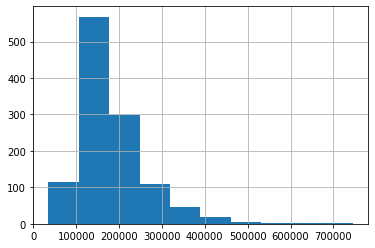

In [ ]:
y_train['SalePrice'].hist()

### 데이터 전처리
- 불필요한 필드 제거
- 이상치처리
- 결측치처리


In [ ]:
#필드제거
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice']

In [ ]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
81,120,32.0,4500,6,5,1998,1998,443.0,1201,0,...,405,0,199,0,0,0,0,0,3,2006
1418,20,71.0,9204,5,5,1963,1963,0.0,25,872,...,336,0,88,0,0,0,0,0,8,2008
1212,30,50.0,9340,4,6,1941,1950,0.0,344,0,...,234,0,113,0,0,0,0,0,8,2009


In [ ]:
#결측치 처리 - SimpleImputer 활용
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [ ]:
X_train

array([[1.20000000e+02, 3.20000000e+01, 4.50000000e+03, ...,
        0.00000000e+00, 3.00000000e+00, 2.00600000e+03],
       [2.00000000e+01, 7.10000000e+01, 9.20400000e+03, ...,
        0.00000000e+00, 8.00000000e+00, 2.00800000e+03],
       [3.00000000e+01, 5.00000000e+01, 9.34000000e+03, ...,
        0.00000000e+00, 8.00000000e+00, 2.00900000e+03],
       ...,
       [6.00000000e+01, 8.90000000e+01, 1.16450000e+04, ...,
        0.00000000e+00, 8.00000000e+00, 2.00600000e+03],
       [6.00000000e+01, 7.00700837e+01, 7.50000000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.01000000e+03],
       [2.00000000e+01, 6.00000000e+01, 7.35000000e+03, ...,
        0.00000000e+00, 6.00000000e+00, 2.00800000e+03]])

In [ ]:
#X_train에서 학습데이터와 검증데이터 분리하기
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((992, 36), (176, 36), (992,), (176,))

### 모델링

In [ ]:
#MSE : (편차)^2을 모두 더한 뒤, 자유도로 나눈 것.  
from sklearn.metrics import mean_squared_error

def rmsle(y, y_prd) : 
  return mean_squared_error(y,y_prd,squared=False)

In [ ]:
#모델링용 함수 불러오기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC

In [ ]:
#Support Vector Machine을 이용해서 분류평가
model = SVC(random_state=1234)
model.fit(X_tr,y_tr)
pred = model.predict(X_val)

print("RMSLE : {}".format(rmsle(y_val, pred)))

RMSLE : 95662.15559991698


In [ ]:
#XGBRegressor()
model = XGBRegressor()
model.fit(X_tr, y_tr, verbose = False)
pred = model.predict(X_val)

print("RMSLE : {}".format(rmsle(y_val, pred)))

[13:16:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE : 29094.81007752282


In [ ]:
#RandomForestClassifier()
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print("RMSLE : {}".format(rmsle(y_val,pred)))

RMSLE : 42723.95749632432


In [ ]:
#RandomForestRegressor()
model = RandomForestRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print("RMSLE : {}".format(rmsle(y_val, pred)))

RMSLE : 32480.553454054123


In [ ]:
pred

array([130461.58, 200667.75, 129485.04, 191597.  , 305759.26, 183062.25,
       154116.  , 274796.69, 197485.75, 174825.31, 147079.  , 112607.11,
       356884.15, 158727.  , 134733.46,  95045.93, 191264.3 , 189881.05,
       121893.88, 227865.59, 173394.27, 152859.15, 146304.5 , 255432.3 ,
       216837.5 , 226230.07, 174918.69, 155091.84, 120300.75,  90028.83,
       268619.56, 178337.25, 231507.08, 225395.92, 123020.8 , 129371.  ,
       228759.48, 229293.55, 119998.33, 154666.02, 145123.82, 179960.  ,
       150783.25, 239098.49, 198106.37,  79995.9 , 137922.46, 115878.05,
       230360.61, 207313.1 , 133034.  , 255869.26, 158822.5 ,  84274.5 ,
       197148.74, 138308.42, 106959.83, 126270.  , 120910.5 , 141611.  ,
       232707.36, 127335.9 , 175305.7 , 151446.  , 144572.66, 155468.92,
       271507.72, 383154.08, 149370.5 ,  99455.13, 161563.2 , 161434.5 ,
       131193.  , 278654.74, 144948.  , 135463.36, 275153.23, 170363.99,
       390448.28, 105560.13, 168488.85, 304563.39, 

In [ ]:
y = y_train['SalePrice']

In [ ]:
final_model = XGBRegressor()
final_model.fit(X_train, y)

prediction = final_model.predict(X_test)

[13:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### 결과물 생성하기

In [ ]:
output = pd.DataFrame(data={'Id':y_test.Id, 'income':prediction})

In [ ]:
output.head()

,Id,income
1380,1381,78130.054688
520,521,96933.140625
1175,1176,329817.437500
351,352,199406.609375
1335,1336,156777.468750


In [ ]:
output.to_csv('19941023.csv',index=False)

### ROC 점수 계산하기

In [ ]:
pred = model.predict(X_test)
print("RMSLE : " + str(rmsle(y_test['SalePrice'], prediction)))

RMSLE : 24888.59406254171


# **Task2-5. Insurance_Starter**

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv(os.path.join(datadir,'task2_5','insurance.csv'))
X_train, X_test, y_train, y_test = exam_data_load(df, target='charges')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 7), (268, 7), (1070, 2), (268, 2))

데이터 탐색

In [ ]:
#데이터 탐색
X_train.head()

,id,age,sex,bmi,children,smoker,region
209,209,40,male,41.230,1,no,northeast
540,540,34,female,38.000,3,no,southwest
747,747,19,male,21.755,0,no,northwest
39,39,60,male,39.900,0,yes,southwest
640,640,33,male,42.400,5,no,southwest


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 66.9+ KB


In [ ]:
y_train.head()

,id,charges
209,209,6610.10970
540,540,6196.44800
747,747,1627.28245
39,39,48173.36100
640,640,6666.24300


데이터 전처리

In [ ]:
#id 필드 제거
testID = X_test.pop('id')

In [ ]:
X_train = X_train.drop('id',axis=1)
y_train = y_train.drop('id',axis=1)

In [ ]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

데이터 엔지니어링

In [ ]:
#X_train과 X_test 합치기
X_train['des'] = 'train'
X_test['des'] = 'test'

X_total = pd.concat([X_train, X_test])
X_total.shape

(1338, 7)

In [ ]:
#문자 필드 라벨인코딩
objCols = ['sex','smoker', 'region']
from sklearn.preprocessing import LabelEncoder

for col in objCols :
  le = LabelEncoder()
  X_total[col] = le.fit_transform(X_total[col])

In [ ]:
#X_train과 X_test 다시 나누기
X_train = X_total.loc[X_total['des']=='train']
X_test = X_total.loc[X_total['des']=='test']

X_train = X_train.drop('des',axis = 1)
X_test = X_test.drop('des',axis=1)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [ ]:
#MinMax스케일러
cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

for col in cols :
  mms = MinMaxScaler()
  X_train[col] = mms.fit_transform(X_train[col].values.reshape(-1,1))
  X_test[col] = mms.transform(X_test[col].values.reshape(-1,1))

모델링

In [ ]:
#RandomForestRegressor를 불러오도록함
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
rfr.score(X_train,y_train)

0.9773346486830947

output 만들기

In [ ]:
output = pd.DataFrame({'id':testID, 'charges':pred})

output.to_csv("19941023.csv",index=False)

점수 확인

In [ ]:
rfr.score(X_test, y_test['charges'])

0.8288174947871657

# **MOCK_EXAM. T2**

In [ ]:
import os

In [ ]:
################## 시험 안내 문구 및 코드 ##################
# 출력을 원하실 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

# 데이터 파일 읽기 예제
import pandas as pd
X_test = pd.read_csv(os.path.join(datadir, 'mock_exam', "X_test.csv"))
X_train = pd.read_csv(os.path.join(datadir, 'mock_exam', "X_train.csv"))
y_train = pd.read_csv(os.path.join(datadir, 'mock_exam', "y_train.csv"))

# 사용자 코딩

# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'enrollee_id': X_test.enrollee_id, 'target': pred}).to_csv('003000000.csv', index=False)

데이터 탐색

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((19158, 13), (2126, 13), (19158, 2))

In [ ]:
X_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [ ]:
y_train.head()

,enrollee_id,target
0,8949,1
1,29725,0
2,11561,0
3,33241,1
4,666,0


In [ ]:
X_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [ ]:
X_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
dtype: int64

In [ ]:
X_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    510
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          310
experience                  5
company_size              621
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [ ]:
#null 레코드
nullCols = ['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

for col in nullCols :
  nullPer = round((X_train[col].isnull().sum()/19158)*100,2)
  print("{} column null percentage : {}".format(col, nullPer))

gender column null percentage : 23.53
enrolled_university column null percentage : 2.01
education_level column null percentage : 2.4
major_discipline column null percentage : 14.68
experience column null percentage : 0.34
company_size column null percentage : 30.99
company_type column null percentage : 32.05
last_new_job column null percentage : 2.21


In [ ]:
X_train.describe()

,enrollee_id,city_development_index,training_hours
count,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896
std,9616.292592,0.123362,60.058462
min,1.000000,0.448000,1.000000
25%,8554.250000,0.740000,23.000000
50%,16982.500000,0.903000,47.000000
75%,25169.750000,0.920000,88.000000
max,33380.000000,0.949000,336.000000


데이터 수정

In [ ]:
#불필요한 필드 제거
testId = X_test.pop('enrollee_id')

X_train = X_train.drop('enrollee_id', axis=1)
y_train = y_train.drop('enrollee_id', axis=1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((19158, 12), (19158, 1), (2126, 12))

In [ ]:
#결측치 제거
for col in nullCols :
  print("{} 컬럼 최빈값 : {}".format(col, X_train[col].value_counts().head(1).index[0]))
  alt = X_train[col].value_counts().head(1).index[0]
  X_train[col] = X_train[col].fillna(alt) 


gender 컬럼 최빈값 : Male
enrolled_university 컬럼 최빈값 : no_enrollment
education_level 컬럼 최빈값 : Graduate
major_discipline 컬럼 최빈값 : STEM
experience 컬럼 최빈값 : >20
company_size 컬럼 최빈값 : 50-99
company_type 컬럼 최빈값 : Pvt Ltd
last_new_job 컬럼 최빈값 : 1


In [ ]:
#이상치 제거
numCols = ['city_development_index','training_hours']

for col in numCols :
  iqr = X_train[col].quantile(0.75)-X_train[col].quantile(0.25)
  min = X_train[col].quantile(0.25)-1.5*iqr
  max = X_train[col].quantile(0.75)+1.5*iqr

  X_train[col] = X_train[col].map(lambda x : min if x < min else x)
  X_train[col] = X_train[col].map(lambda x : max if x > max else x)
  

In [ ]:
#제거 후 평균과 중위수 확인
X_train.describe()

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828868,62.176793
std,0.123303,50.212703
min,0.470000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,185.500000


데이터 엔지니어링

In [ ]:
#문자필드 라벨 인코딩을 위해 병합
X_train['desc'] = 'train'
X_test['desc'] = 'test'

X_total = pd.concat([X_train, X_test])

In [ ]:
#문자필드 라벨인코딩
from sklearn.preprocessing import LabelEncoder

objCols = ['city','gender','relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type','last_new_job',]

for col in objCols :
  le = LabelEncoder()
  X_total[col] = le.fit_transform(X_total[col])


In [ ]:
#데이터 분리
X_train = X_total.loc[X_total.desc=='train']
X_test = X_total.loc[X_total.desc=='test']

X_train = X_train.drop('desc', axis=1)
X_test = X_test.drop('desc', axis=1)

X_train.shape, X_test.shape

((19158, 12), (2126, 12))

In [ ]:
#필드 스케일링
from sklearn.preprocessing import MinMaxScaler

for col in X_train.columns :
  mms = MinMaxScaler()
  X_train[col] = mms.fit_transform(X_train[col].values.reshape(-1,1))
  X_test[col] = mms.transform(X_test[col].values.reshape(-1,1))

In [ ]:
X_train.corr()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,1.000000,-0.326130,0.024032,0.006154,-0.074003,0.003173,0.107804,-0.042534,0.015070,0.009027,-0.011676,0.004571
city_development_index,-0.326130,1.000000,-0.019785,-0.059707,0.165549,0.070529,-0.114647,0.035426,-0.017403,-0.009788,0.022796,0.004265
gender,0.024032,-0.019785,1.000000,0.004455,-0.022702,-0.011144,0.066154,0.005106,0.015523,0.035429,0.029059,-0.002876
relevent_experience,0.006154,-0.059707,0.004455,1.000000,-0.372919,0.062577,-0.009968,-0.008290,0.129060,0.087295,0.170767,-0.013812
enrolled_university,-0.074003,0.165549,-0.022702,-0.372919,1.000000,0.064493,-0.096442,0.022663,-0.081021,-0.028769,0.006387,0.006666
education_level,0.003173,0.070529,-0.011144,0.062577,0.064493,1.000000,0.034784,0.016333,0.012493,-0.009115,0.069009,-0.014627
major_discipline,0.107804,-0.114647,0.066154,-0.009968,-0.096442,0.034784,1.000000,-0.001555,-0.001813,0.020189,0.014777,0.002476
experience,-0.042534,0.035426,0.005106,-0.008290,0.022663,0.016333,-0.001555,1.000000,0.010131,0.009667,0.060750,-0.003729
company_size,0.015070,-0.017403,0.015523,0.129060,-0.081021,0.012493,-0.001813,0.010131,1.000000,0.019389,0.062607,0.005604
company_type,0.009027,-0.009788,0.035429,0.087295,-0.028769,-0.009115,0.020189,0.009667,0.019389,1.000000,0.135871,-0.013414


모델링

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
rf.score(X_train, y_train)

0.9966071614991127

아웃풋 만들기

채점

In [ ]:
import pickle
import numpy as np
from sklearn.metrics import roc_auc_score

with open( os.path.join(datadir,'mock_exam',"answer.pickle"), "rb" ) as file:
    ans = pickle.load(file)
    ans = pd.DataFrame(ans)
print(roc_auc_score(ans['target'], pred))

0.6006485215053763
